In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

print(f'O conjunto de dados customers tem {len(customers)} entradas')
print(f'O conjunto de dados orders tem {len(orders)} entradas')
print(f'O conjunto de dados order_items tem {len(order_items)} entradas')
print(f'O conjunto de dados products tem {len(products)} entradas')

O conjunto de dados customers tem 99441 entradas
O conjunto de dados orders tem 99441 entradas
O conjunto de dados order_items tem 112650 entradas
O conjunto de dados products tem 32951 entradas


In [2]:
df = customers.merge(orders, left_on='customer_id', right_on='customer_id')
df = df.merge(order_items, left_on='order_id', right_on='order_id')

In [3]:
print(f'O conjunto de dados df tem {len(df)} entradas e {len(df.columns.tolist())} colunas')
df[['customer_id','customer_city']]

O conjunto de dados df tem 112650 entradas e 18 colunas


,customer_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas
5,879864dab9bc3047522c92c82e1212b8,jaragua do sul
6,fd826e7cf63160e536e0908c76c3f441,sao paulo
7,5e274e7a0c3809e14aba7ad5aae0d407,timoteo
8,5adf08e34b2e993982a47070956c5c65,curitiba
9,4b7139f34592b3a31687243a302fa75b,belo horizonte


(0, 1500)

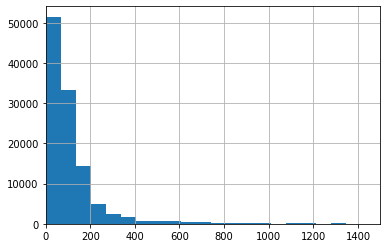

In [4]:
df.price.hist(bins=100)
plt.xlim(0, 1500)

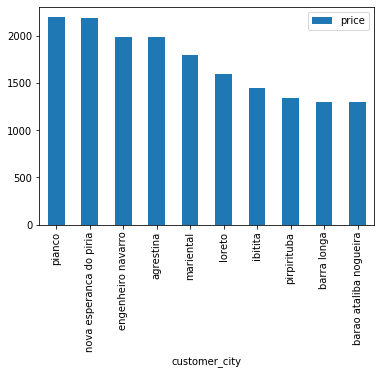

In [5]:
#media de compras para cada cidade
df[['customer_city','price']].groupby(by='customer_city').mean().sort_values(by='price', ascending=False).head(10).plot.bar()

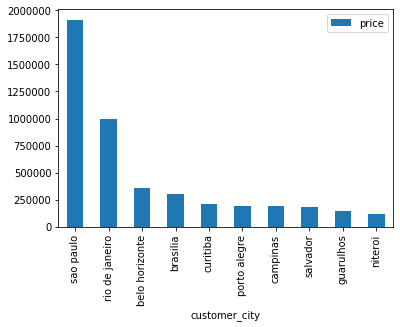

In [6]:
# soma de compras para cada cidade
df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=False).head(10).plot.bar()

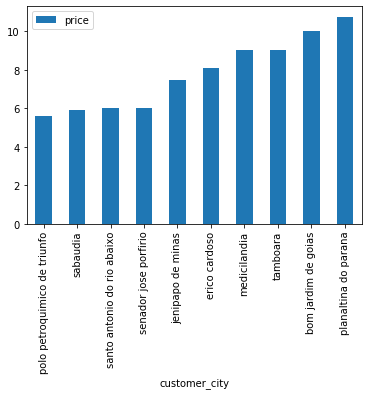

In [7]:
# soma de compras para cada cidade - menores
df[['customer_city','price']].groupby(by='customer_city').sum().sort_values(by='price', ascending=True).head(10).plot.bar()

In [8]:
df = df.merge(products[['product_id', 'product_category_name']], left_on='product_id', right_on='product_id')

In [9]:
# categorias de produts com maior venda em valor - preço medio
df[['product_category_name', 'price']].groupby(by='product_category_name').mean().sort_values(by='price', ascending=False).head(10)

,price
product_category_name,
pcs,1098.340542
portateis_casa_forno_e_cafe,624.285658
eletrodomesticos_2,476.124958
agro_industria_e_comercio,342.124858
instrumentos_musicais,281.616000
eletroportateis,280.778468
portateis_cozinha_e_preparadores_de_alimentos,264.568667
telefonia_fixa,225.693182
construcao_ferramentas_seguranca,208.992371


In [10]:
# categorias de produts com maior venda em valor - valume de vendas medio
df[['product_category_name', 'price']].groupby(by='product_category_name').sum().sort_values(by='price', ascending=False).head(10)

,price
product_category_name,
beleza_saude,1258681.34
relogios_presentes,1205005.68
cama_mesa_banho,1036988.68
esporte_lazer,988048.97
informatica_acessorios,911954.32
moveis_decoracao,729762.49
cool_stuff,635290.85
utilidades_domesticas,632248.66
automotivo,592720.11
